# Assignment 1: KNN

For this part of assignment, you are tasked to implement KNN algorithm and test it on the a subset of CIFAR10 dataset.

You sould run the whole notebook and answer the question in the notebook.

TO SUBMIT: PDF of this notebook with all the required outputs and answers.

## Prepare Dataset

Since CIFAR10 is a relative large dataset, and KNN is quite time-consuming method, we only a small sub-set of CIFAR10 for KNN part

In [1]:
from utils.data_processing import get_cifar10_data

# Use a subset of CIFAR10 for KNN assignments
dataset = get_cifar10_data(subset_train=5000, subset_val=250, subset_test=500)

print(dataset.keys())
print("Training Set Data  Shape: ", dataset["x_train"].shape)
print("Training Set Label Shape: ", dataset["y_train"].shape)


dict_keys(['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test'])
Training Set Data  Shape:  (5000, 3072)
Training Set Label Shape:  (5000,)


In [2]:
# Import Packages
import numpy as np
import matplotlib.pyplot as plt


## Implementation (60%)

You need to implement the KNN method in `algorithms/knn.py`. You need to fill in the prediction function(since the training of KNN is just remembering the training set).

For KNN implementation, you are tasked to implement two version of it.

* Two Loop Version: use one loop to iterate through training samples and one loop to iterate through test samples
* One Loop Version: use one loop to iterate through test samples and use broadcast (https://numpy.org/doc/stable/user/basics.broadcasting.html) feature of numpy to calculate all the distance at once

Note: It is possible to build a Fully Vectorized Version without explicit for loop to calculate the distance, but you do not have to do it in this assignment. You could use the fully vectorized version to replace the loop versions as well.

For distance function, in this assignment, we use Eucliean distance between samples.

In [3]:
from algorithms import KNN

knn = KNN(num_class=10)
knn.train(
    x_train=dataset["x_train"],
    y_train=dataset["y_train"],
    k=5,
)


### Compare the time consumption of different method

In this section, you will test your different implementation of KNN method, and compare their speed.

In [4]:
from utils.evaluation import get_classification_accuracy


#### Two Loop Version:

In [5]:
import time

c_t = time.time()
prediction = knn.predict(dataset["x_test"], loop_count=2)
print("Two Loop Prediction Time:", time.time() - c_t)

test_acc = get_classification_accuracy(prediction, dataset["y_test"])
print("Test Accuracy:", test_acc)


Two Loop Prediction Time: 22.82407021522522
Test Accuracy: 0.278


#### One Loop Version 

In [6]:
import time

c_t = time.time()
prediction = knn.predict(dataset["x_test"], loop_count=1)
print("One Loop Prediction Time:", time.time() - c_t)

test_acc = get_classification_accuracy(prediction, dataset["y_test"])
print("Test Accuracy:", test_acc)


One Loop Prediction Time: 17.994252920150757
Test Accuracy: 0.278


**Your different implementation should output the exact same result**


## Test different Hyper-parameter (20%)

For KNN, there is only one hyper-parameter of the algorithm: How many nearest neighbour to use(**K**).

Here, you are provided the code to test different k for the same dataset.

/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword ar

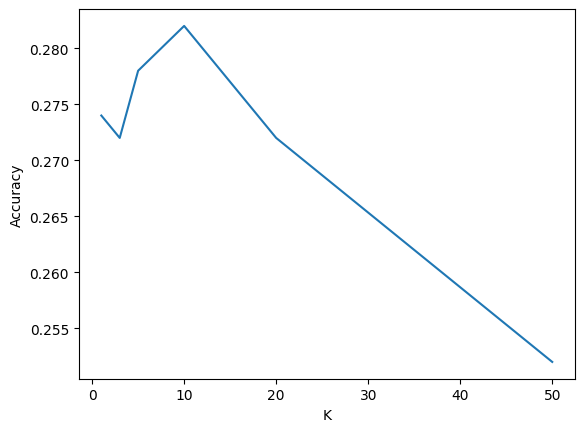

In [7]:
accuracies = []

k_candidates = [1, 3, 5, 10, 20, 50]
for k_cand in k_candidates:
    prediction = knn.predict(x_test=dataset["x_test"], k=k_cand)
    acc = get_classification_accuracy(prediction, dataset["y_test"])
    accuracies.append(acc)
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.plot(k_candidates, accuracies)
plt.show()


### Inline Question 1:

Please describe the output result you get, and provide some explanation as well.


### Your Answer:

**Put Your Answer Here**
Based on the graph, the accuracy reaches its peak (around 0.282) when k is approximately 10, indicating this is the optimal number of neighbors for this dataset. For small k values (1-3), the accuracy shows instability and fluctuations, while for larger k values (>10), the accuracy steadily decreases, dropping to its lowest point (about 0.255) at k=50. This suggests that k=10 provides the best balance between overfitting (which occurs with small k) and underfitting (which occurs with large k) for this specific classification task.

## Try different feature representation (19%)

Since machine learning method rely heavily on the feature extraction, you will see how different feature representation affect the performance of the algorithm in this section. 

You are provided the code about using **HOG** descriptor to represent samples in the notebook.

In [8]:
from utils.data_processing import get_cifar10_data
from utils.data_processing import HOG_preprocess
from functools import partial

# Delete previous dataset to save memory
del dataset
del knn

# Use a subset of CIFAR10 for KNN assignments
hog_p_func = partial(
    HOG_preprocess,
    orientations=9,
    pixels_per_cell=(4, 4),
    cells_per_block=(1, 1),
    visualize=False,
    multichannel=True,
)
dataset = get_cifar10_data(
    feature_process=hog_p_func, subset_train=5000, subset_val=250, subset_test=500
)


Start Processing
Processing Time: 7.293390274047852


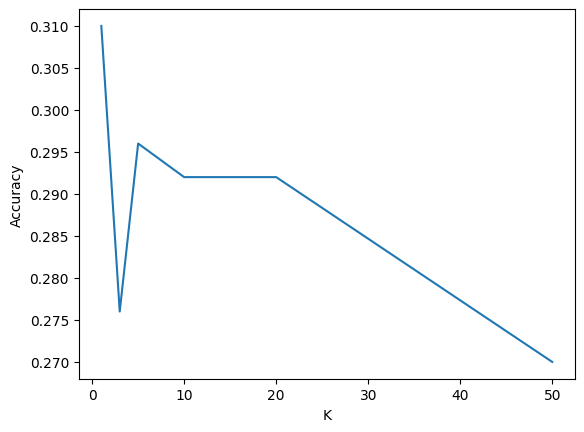

In [9]:
knn = KNN(num_class=10)
knn.train(
    x_train=dataset["x_train"],
    y_train=dataset["y_train"],
    k=5,
)
accuracies = []

k_candidates = [1, 3, 5, 10, 20, 50]
for k_cand in k_candidates:
    prediction = knn.predict(x_test=dataset["x_test"], k=k_cand)
    acc = get_classification_accuracy(prediction, dataset["y_test"])
    accuracies.append(acc)

plt.ylabel("Accuracy")
plt.xlabel("K")
plt.plot(k_candidates, accuracies)
plt.show()


### Inline Question 2:

Please describe the output result you get, compare with the result you get in the previous section, and provide some explanation as well.

### Your Answer:

**Put Your Answer Here**
Comparing the two implementations, the HOG feature representation shows slightly better overall accuracy (27-31%) compared to the previous method (25.5-28%), though with more volatility at lower k values. The HOG implementation demonstrates a sharp peak at k=1 with 31% accuracy, followed by fluctuations before stabilizing, while the previous method showed a smoother curve with a peak around k=10. Both implementations share a similar declining trend with larger k values, suggesting that using too many neighbors reduces classification accuracy regardless of the feature representation method, though HOG's better performance indicates its effectiveness in capturing local shape information

## Survey (1%)

### Question:

How many hours did you spend on assignment 1?

### Your Answer:
7 hours